<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_02/CAP413_HandsOn_02_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>

<img src=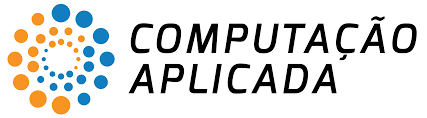 align=”middle”>


# CAP-417-3: Estatística Computacional
## Hands On 02

* Luan Orion Baraúna 

These exercices has proveide for [this](https://youtu.be/F-Z6p87Fifs) class. 



## 0. Provacation
Perfect Linear Relation 

For the generations of a "perfect" linear relation we will genrenate a randow values beteween a 0 and 100 using the `numpy` python library. 

$$
y = f (x) = a \cdot x + b
$$

*  $a < 0, a = 0, a > 0$

*  $b < 0, b = 0, b > 0$


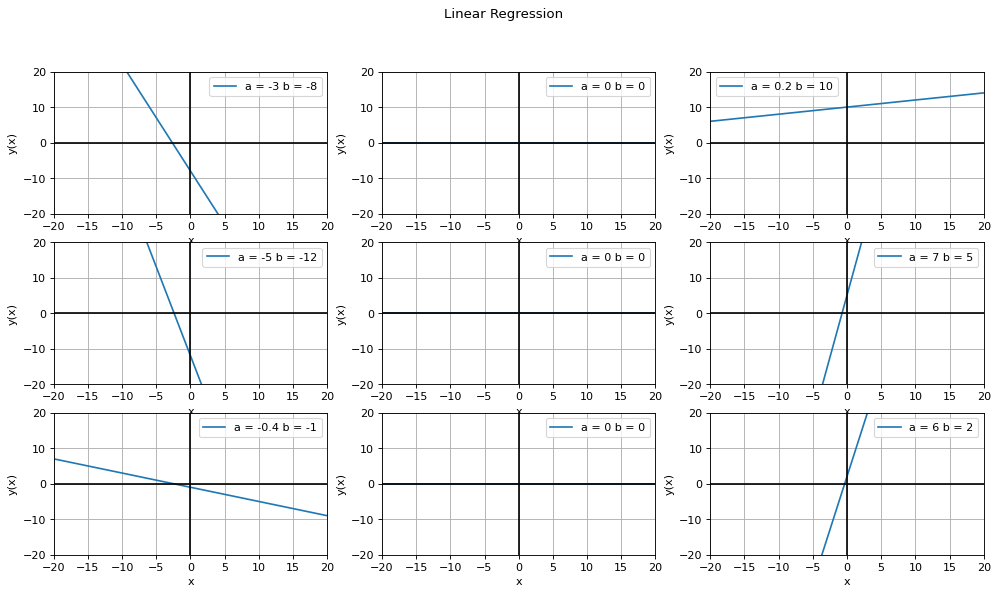

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import random

#Defing the Function
def y(x,a,b): return(a*x+b)
#Creating a x range
x = np.linspace(-100,100)

#Creating the figure envirement
figure(figsize=(15, 8), dpi=80)
#Figure Paramentes
x_min, x_max = -20,20
y_min, y_max = -20,20

a_ = [-3,0,0.2,
     -5,0,7,
     -0.4,0,6]

b_ = [-8,0,10,
     -12,0,5,
     -1,0,2]

plt.suptitle('Linear Regression')

for i in range(1,len(a_)+1):
    plt.subplot(3,3,i)
    a,b  = a_[i-1], b_[i-1]
    plt.plot(x,y(x,a,b) , label='a = '+str(a)+' b = '+str(b) )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True, which='both')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()

## 1- Diretct and Inverse Problem 

_From $x$, $y(x)$, what is the value of a and b?_


### High School Way 

For these task we will use the classic way to find the angular coefieinct of line.

<img src=http://www.estgv.ipv.pt/PaginasPessoais/fmartins/Aluno/Matem%C3%A1tica/Ensino%20m%C3%A9dio/Geometria%20analitica%20%20Retas/Image6.gif>


$$
y(x) = ax+b
$$

$$
y(x_1) - y(x_0) = ax_1 + b - ax_2 - b
$$

$$
y(x_1) - y(x_0) = a(x_1 + - x_2)
$$

$$
a = \frac{y(x_1) - y(x_0)}{x_1 - x_0}
$$

For these, we will generate a random value for $a$ and $b$ create a linear distribuitions and calculate 

`a = (y[x[i]] - y[x[i-1]])/(x[i]-x[i-1])`

For the calculation of $b$ we will calculate 

$$
y(0) = b
$$


In [ ]:
import random as rnd

x = np.linspace(0,100)
a, b = np.random.rand() ,np.random.rand()
def y(x):return a*x+b

#Distance beteweem two points
delta = 1
a_cal = (y(x[i])-y(x[i-delta]))/(x[i]-x[i-delta])

print('Valor inicial de a  ', a)
print('Valor calculado de a',a_cal)
print('Diferença para a é  ',abs(a-a_cal))

b_cal = y(0)

print('\nValor inicial de b', b)
print('Valor calculado de b',b_cal)
print('Diferença para b é  ',abs(b-b_cal))


Valor inicial de a   0.1421570116539269
Valor calculado de a 0.14215701165392663
Diferença para a é   2.7755575615628914e-16

Valor inicial de b 0.7690425831187977
Valor calculado de b 0.7690425831187977
Diferença para b é   0.0


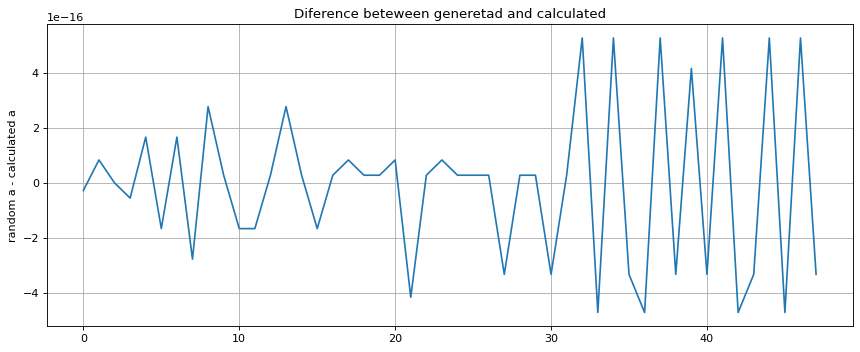

In [ ]:
#Ploting the diference value
a_dif = []
for i in range(1,len(x)-1,delta): a_dif.append(a-(y(x[i])-y(x[i-delta]))/(x[i]-x[i-delta]))

figure(figsize=(13, 5), dpi=80)
plt.plot(a_dif,label='Delta = '+str(delta))
plt.title('Diference beteween generetad and calculated')
plt.ylabel('random a - calculated a')
plt.grid(True, which='both')
plt.plot()
plt.show()

## 2- Regression

### 2.1 Exaustive Search

The exhaustive search is the calculation of all points within a certain range for each of the variables. Therefore, we will use the mean square error as a criterion. We will also compute the other errors in order to observe how the exploration in the parameter space occurs.The exhaustive search is the calculation of all points within a certain range for each of the variables. Therefore, we will use the mean square error as a criterion. We will also compute the other errors in order to observe how the exploration in the parameter space occurs.
$$
{\displaystyle \operatorname {MER} ={\frac {1}{n}}\sum _{i=1}^{n}(y(x_{i})-{{y'(x_{i})}})}
$$

$$
{\displaystyle \operatorname {ABS} ={\frac {1}{n}}\sum _{i=1}^{n}(|y(x_{i})-{{y'(x_{i})|}})}
$$


$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y(x_{i})-{{y'(x_{i})}})^{2}}
$$


In [ ]:
x = np.linspace(0,100)
a, b = np.random.rand() ,np.random.rand()
y_original = a*x+b

In [ ]:
#Values of a and b
a,b

(0.625715039211483, 0.6553997830399177)

In [ ]:
#Exhaustive Search
a_exaus, b_exaus = [],[]
err_exa_normal, err_exa_abslot,err_exa_mensqu = [],[],[]

err_init,best_a, best_b = 1e8, 0,0

for i in range (1,1000):
    for j in range(1,1000):
        a_exaus_var ,b_exaus_var = 1e-3*i,1e-3*j
        y_cansado = a_exaus_var*x + b_exaus_var
        a_exaus.append(a_exaus_var)
        b_exaus.append(b_exaus_var)
        err_exa_normal.append(sum((y_original-y_cansado))/len(y_cansado))
        err_exa_abslot.append(sum(abs((y_original-y_cansado)))/len(y_cansado))
        err_exa_mensqu.append(sum((y_original-y_cansado)**2)/len(y_cansado))
        err = err_exa_mensqu[-1]        
        if err < err_init: 
            err_init = err
            best_a = a_exaus_var
            best_b = b_exaus_var          

print('Original Value of a =',round(a,5),'\Original Value for b = ',round(b,5))        
print('Best Value for a = ',best_a,'\nBest Value for b = ',best_b)        

Original Value of a = 0.62572 \Original Value for b =  0.6554
Best Value for a =  0.626 
Best Value for b =  0.641


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


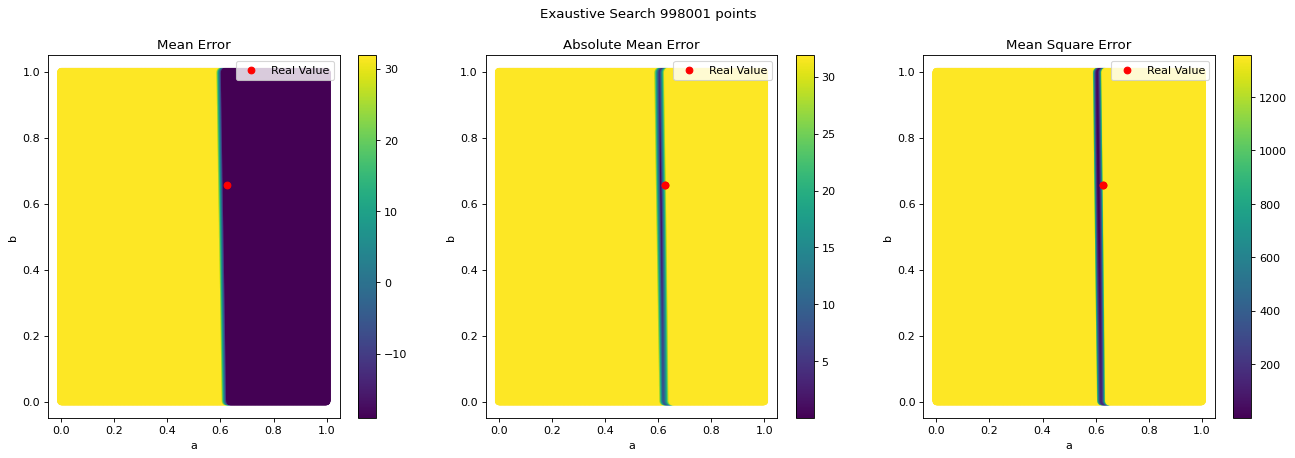

In [ ]:
figure(figsize=(20, 6), dpi=80)

plt.suptitle('Exaustive Search '+ str(len(a_exaus)) +' points')

plt.subplot(1,3,1)
colors = plt.cm.viridis(err_exa_normal)
sc=plt.scatter(a_exaus, b_exaus, c=colors)
plt.clim(min(err_exa_normal), max(err_exa_normal))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Mean Error")

plt.subplot(1,3,2)
colors = plt.cm.viridis(err_exa_abslot)
sc=plt.scatter(a_exaus, b_exaus, c=colors)
plt.clim(min(err_exa_abslot), max(err_exa_abslot))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Absolute Mean Error")

plt.subplot(1,3,3)
colors = plt.cm.viridis(err_exa_mensqu)
sc=plt.scatter(a_exaus, b_exaus, c=colors)
plt.clim(min(err_exa_mensqu), max(err_exa_mensqu))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value',zorder=1)
plt.legend()
plt.title("Mean Square Error")
plt.show()

### 2.3 Stochastic Optimization

We will build an algorithm that generates a new value of parameters a and b randomly and see how close these values are to the original value.

For this we will build a _lambda_ parameter that allows a fraction of this random step. In this way, preventing the step from going, increasingly in random directions.

We will explore some errors functions just like:

$$
y'(x) = \lambda_a a_{\text{new}} \cdot x + \lambda_b b_{\text{new}}
$$

This algorithm will minimize:

$$
\Delta a = a - a_{\text{new}}
$$ 

$$
\Delta b = b- b_{\text{new}}
$$



In [ ]:
#size of the spet
lambda_a = 1
lambda_b = 1
# Minimum  diference
minimum_diference = 1e-6

#Inicial Paramentes    
dife_a, dife_b, error  = 10,10, 1e10
times,times_a,times_b,times_err = 0,0,0,0
a_init, b_init, error_init = 10,10, 1e10

y_original = a*x+b

#Inicial empity vectors
vec_a, vec_b, vec_error, time_a, time_b, time_err, time_all = [],[],[],[],[],[],[]
all_a, all_b, all_err_normal, all_err_absot, all_err_mensqu = [],[],[],[],[]
vec_error_abslot = []
vec_error_normal = []

while (abs(dife_a) > minimum_diference and abs(dife_b) > minimum_diference and error > minimum_diference):
    
    time_all.append(times)
    times = times+1
    #new parameters
    #new_a, new_b  = random.uniform(-1, 1), random.uniform(-1, 1)
    new_a, new_b  =np.random.rand() ,np.random.rand()
    #Diferences
    dife_a, dife_b = abs(a - new_a), abs(b - new_b)
    
    y_line = new_a*x+new_b
    
    error_normal = sum((y_original-y_line))/len(y_line)
    error_abslot = sum(abs((y_original-y_line)))/len(y_line)
    error_mensqu = sum((y_original-y_line)**2)/len(y_line)
    error = error_mensqu
    
    all_a.append(new_a)        
    all_b.append(new_b)        
    all_err_normal.append(error_normal)
    all_err_absot.append(error_abslot)
    all_err_mensqu.append(error_mensqu)
    
    if  dife_a < a_init:
        vec_a.append(new_a)
        time_a.append(times_a)
        times_a = times_a + 1
        a_init = dife_a
    else: pass
    
    if  dife_b < b_init:
        vec_b.append(new_b)
        time_b.append(times_b)
        times_b = times_b + 1
        b_init = dife_b
    else: pass
    
    if error < error_init:
        vec_error.append(error)
        vec_error_abslot.append(error_abslot)
        vec_error_normal.append(error_normal)
        time_err.append(times_err)
        times_err = times_err + 1
        error_init = error
    else: pass

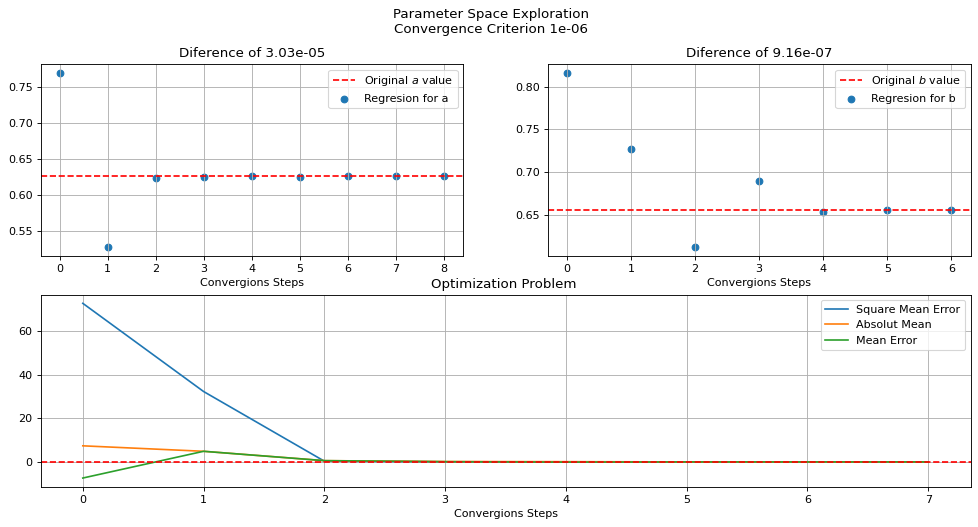

In [ ]:
figure(figsize=(15, 7), dpi=80)

plt.suptitle('Parameter Space Exploration\nConvergence Criterion '+str(minimum_diference))

plt.subplot(2,2,1)
plt.scatter(time_a,vec_a,label='Regresion for a')
plt.axhline(y=a, color='red',linestyle='--',label='Original $a$ value')
plt.title('Diference of '+str(format(abs(vec_a[-1]-a),'1.2e')))
plt.grid()
plt.xlabel('Convergions Steps')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(time_b,vec_b,label='Regresion for b')
plt.axhline(y=b, color='red',linestyle='--',label='Original $b$ value')
plt.title('Diference of '+str(format(abs(vec_b[-1]-b),'1.2e')))
plt.xlabel('Convergions Steps')
plt.grid()#True, which='both')
plt.legend()

plt.subplot(2,2,(3,4))
plt.plot(vec_error, label = 'Square Mean Error')
plt.plot(vec_error_abslot, label = 'Absolut Mean')
plt.plot(vec_error_normal, label = 'Mean Error')
#plt.scatter(time_err,vec_error,label='Regresion for error')
plt.axhline(y=0, color='red',linestyle='--')
plt.title('Optimization Problem ')#+str(format(vec_error[-1],'1.2e')))
plt.xlabel('Convergions Steps')
plt.legend()
plt.grid()#True, which='both')
#plt.legend()
plt.show()

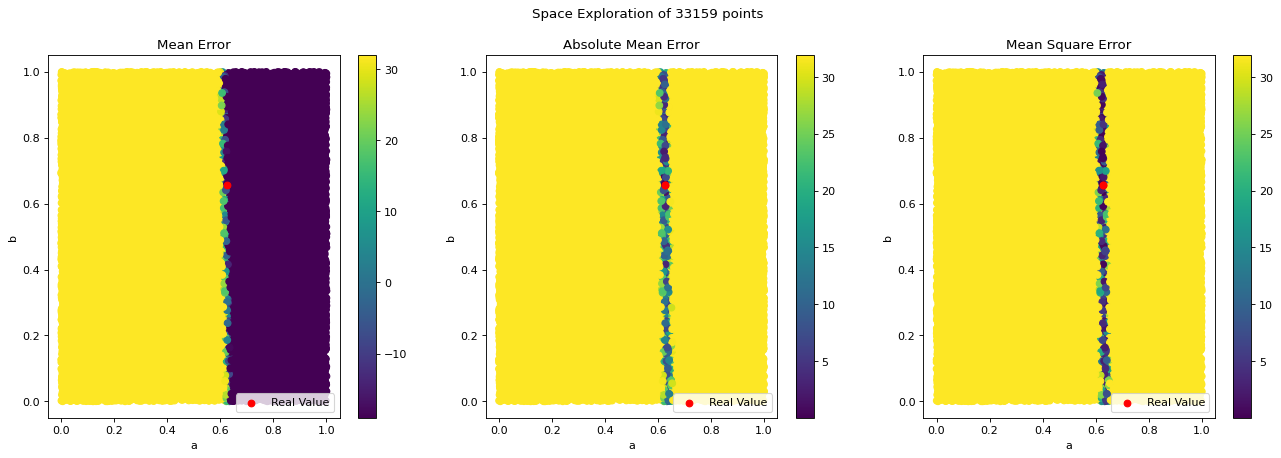

In [ ]:
figure(figsize=(20, 6), dpi=80)

plt.suptitle('Space Exploration of '+ str(times) +' points')

plt.subplot(1,3,1)
colors = plt.cm.viridis(all_err_normal)
sc=plt.scatter(all_a, all_b, c=colors)
plt.clim(min(all_err_normal), max(all_err_normal))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Mean Error")

plt.subplot(1,3,2)
colors = plt.cm.viridis(all_err_absot)
sc=plt.scatter(all_a, all_b, c=colors)
plt.clim(min(all_err_absot), max(all_err_absot))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Absolute Mean Error")


plt.subplot(1,3,3)
colors = plt.cm.viridis(all_err_mensqu)
plt.scatter(all_a, all_b, c=colors)

plt.clim(min(all_err_absot), max(all_err_absot))
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value',zorder=1)
plt.legend()
plt.title("Mean Square Error")
plt.show()

### 2.4 Analytical Optimization Approache


#### Mínimos Quadrados

Let the function:
s estimating, actually:

$$
{\displaystyle y_{i}=a+bx_{i}+e_{i}\,\!}
$$

where $e$ represents the residuals.

Replacing $e_i$ with ${\displaystyle y_{i}-a-bx_{i}\,\!}$, we get:

$$
{\displaystyle S(a,b)=\sum _{i=1}^{n}\left(y_{i}-a-bx_{i}\right)^{2}}
$$

Minimization takes place by differentiating $S(a,b)$ with respect to ${\displaystyle a\,\!}$ and ${\displaystyle b\,\!}$ using the chain rule and then setting it to zero:

$$
{\displaystyle 
{\begin{aligned}{\partial S \over \partial a}&={\partial S \over \partial x}{\partial x \over \partial a}\\
{\partial S \over \partial x}&=2\sum _{i=1}^{n}\left(y_{i}-a-bx_{i}\right)\\
{\partial x \over \partial a}&=-1
\\{\partial S \over \partial a}&=-2\sum _{i=1}^{n}\left(y_{i}-a-bx_{i}\right)=0\\
{\partial S \over \partial b}&=-2\sum _{i=1}^{n}x_{i}\left(y_{i}-a-bx_{i}\right)=0\\
\end{aligned}}} 
$$


Distributing and dividing the first expression by ${\displaystyle 2n\,\!}$ we have:

$$
{\displaystyle 
{\begin{aligned}&{\frac {-2\sum _{i=1}^{n}y_{i}}{2n}}+{\frac {2\sum _{i=1}^{n}a}{2n}}+{\frac {2\sum _{i=1}^{n}bx_{i}}{2n}}={\frac {0}{2n}}\\
&{\frac {-\sum _{i=1}^{n}y_{i}}{n}}+{\frac {\sum _{i=1}^{n}a}{n}}+{\frac {b\sum _{i=1}^{n}x_{i}}{n}}=0\\
&-{\bar {y}}+a+b{\bar {x}}=0\\
&a={\bar {y}}-b{\bar {x}}
\end{aligned}}} 
$$

where ${\displaystyle {\bar {y}}}$ is the sample mean of ${\displaystyle y\,\!}$ and ${\displaystyle {\bar {x}}}$ is the sample mean of $ {\displaystyle x\,\!}$.

so we find that

$$
{\displaystyle 
{\begin{aligned}&-2\sum _{i=1}^{n}x_{i}\left(y_{i}-{\bar {y}}+b{\bar {x}}-bx_{i}\right)=0\\
&\sum _{i=1}^{n}\left[x_{i}\left(y_{i}-{\bar {y}}\right)+x_{i}b\left({\bar {x}}-x_{i}\right)\right]=0\\
&\sum _{i=1}^{n}x_{i}\left(y_{i}-{\bar {y}}\right)+b\sum _{i=1}^{n}x_{i}\left({\bar {x}}-x_{i}\right)=0\\
\end{aligned}}} 
$$

where do we find

$$
b={\frac {\sum _{i=1}^{n}x_{i}\left(y_{i}-{\bar {y}}\right)}{\sum _{i=1} ^{n}x_{i}\left(x_{i}-{\bar {x}}\right)}}
$$

<!-- Some books also use a different formula that yields the same result:

$$
{\displaystyle b={\frac {\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)\left(y_{i}-{\bar {y}}\right)}{\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}}
$$ -->



#### Geometric interpretation

The least squares optimization method seeks to minimize the frames that intersect the line.


<img src="https://qph.fs.quoracdn.net/main-qimg-c69f7c9af19fdcf2edcd0f3186b32980">



ref.: http://www.fis.ufba.br/sites/fis.ufba.br/files/teoria_dos_erros.pdf

## 3- Noise Adition

<img src="https://miro.medium.com/max/629/1*_HoMKjrWahRiI-JmwYW6zg.pnghttps://miro.medium.com/max/629/1*_HoMKjrWahRiI-JmwYW6zg.png">

For now let's create a new dataset consisting of some measurement errors. Let's imagine the linear function in the format below that we will call _"Baranuna's Linear Function"_.

$$
y(x) = \pi x + e
$$

Where $\pi$ and $e$ are the fundamental constants of mathmatics.

Let's assume that the measurements performed on $y$ for each value of $x$ were made with questionable accuracy. In this way we have that the values of y do not correspond perfectly to our linear function.

### Additive Noise

$$
y'(x) = \pi x + e + NOISE
$$

### Multiplicative Noise

$$
y'(x) = \pi x + e\cdot NOISE
$$

### Additive and Multiplicative Noise

$$
y'(x) = (\pi x + e)\cdot NOISE
$$

Onde 

$$
NOISE = \kappa \cdot random[-1,1]
$$

For these problem we will use `sklearn` python libray and use the $R^2$ parameter has avalutarion 

$$
{\displaystyle R^{2}= 1- \frac{\sum _{i}(y_{i}-f_{i})^{2}}{\sum _{i}(y_{i}-{\bar {y}})^{2}}}
$$




In [ ]:
import numpy as np
from numpy import random
import random

#Size of the data
Number_of_points = 25

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = [round(kappa*random.uniform(-1, 1),4) for i in range(Number_of_points)]

# y of linar distribuiton 
y_non = np.pi*x + np.e
y_add = np.pi*x + np.e + NOISE
y_mul = np.pi*x + np.e*np.array(NOISE)
y_mea = (np.pi*x + np.e +1)*np.array(NOISE) 


No handles with labels found to put in legend.


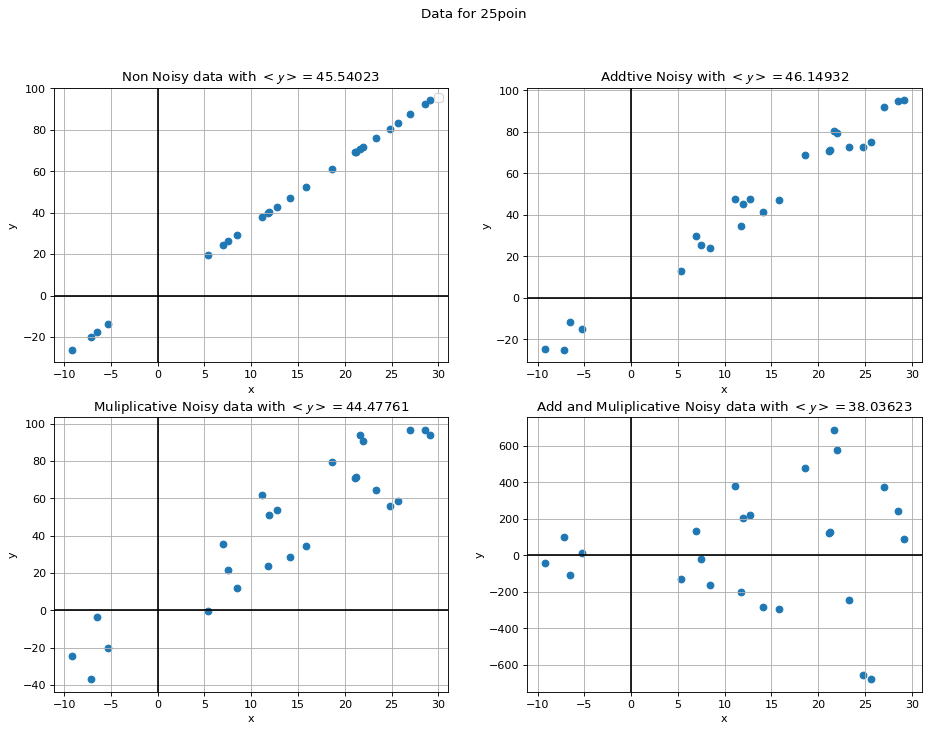

In [ ]:
figure(figsize=(14, 10), dpi=80)

plt.suptitle('Data for '+str(Number_of_points)+ 'poin')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.title('Non Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_non),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.grid()#True, which='both')

plt.subplot(2,2,2)
plt.scatter(x,y_add)
plt.title('Addtive Noisy with $<\mathcal{y}> = $'+str(round(np.mean(y_add),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()#True, which='both')

plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.title('Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mul),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()#True, which='both')

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.title('Add and Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mea),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()#True, which='both')

plt.show()

plt.show()

### Linear Regression Using `sklean`

To find the values of linar parametes we will use a python libraby called `sklearn`.

#### 3.1 25 data Points

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))

model_non    = LinearRegression().fit(x, y_non)
r_sq_non     = model_non.score(x, y_non)
a_non, b_non = model_non.coef_ ,  model_non.intercept_

model_add    = LinearRegression().fit(x, y_add)
r_sq_add     = model_add.score(x, y_add)
a_add, b_add = model_add.coef_ ,  model_add.intercept_

model_mul    = LinearRegression().fit(x, y_mul)
r_sq_mul     = model_mul.score(x, y_mul)
a_mul, b_mul = model_mul.coef_ ,  model_mul.intercept_

model_mea    = LinearRegression().fit(x, y_mea)
r_sq_mea     = model_mea.score(x, y_mea)
a_mea, b_mea = model_mea.coef_ ,  model_mea.intercept_

# print('coefficient of determination:', r_sq)
# print('intercept or b parameter',fit_b)
# print('slope or the angular coeficiente:', fit_a)

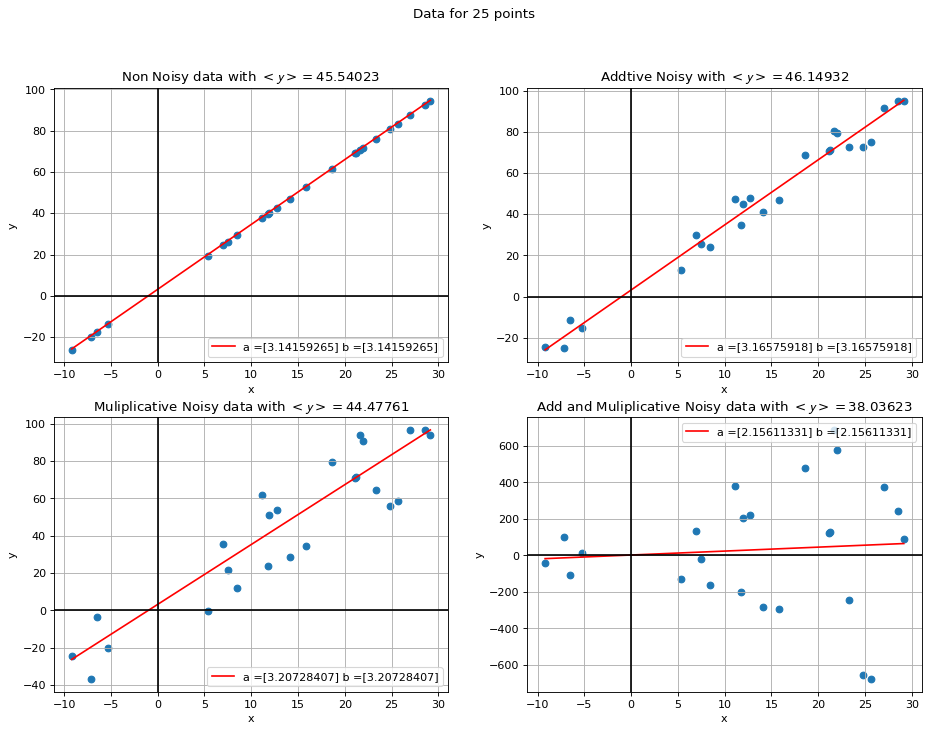

In [ ]:
figure(figsize=(14, 10), dpi=80)

plt.suptitle('Data for '+str(Number_of_points)+ ' points')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.plot(x,(a_non*x+a_non),color='red',label='a ='+str(a_non)+' b ='+str(a_non))
plt.title('Non Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_non),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x,y_add)

plt.plot(x,(a_add*x+a_add),color='red',label='a ='+str(a_add)+' b ='+str(a_add))
plt.title('Addtive Noisy with $<\mathcal{y}> = $'+str(round(np.mean(y_add),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.plot(x,(a_mul*x+a_mul),color='red',label='a ='+str(a_mul)+' b ='+str(a_mul))
plt.title('Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mul),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.plot(x,(a_mea*x+a_mea),color='red',label='a ='+str(a_mea)+' b ='+str(a_mea))
plt.title('Add and Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mea),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.show()

#### 3.2 1000 data Points



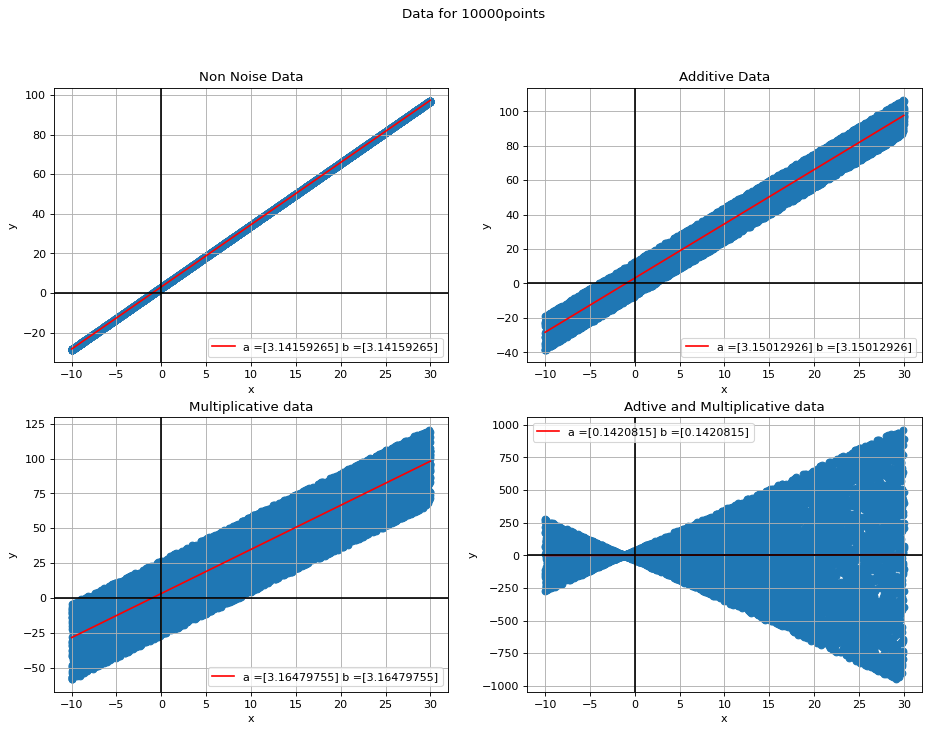

In [ ]:
import numpy as np
from numpy import random

#Size of the data
Number_of_points = 10000

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
#Sorting the x vetor
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = [kappa*random.uniform(-1, 1) for i in range(Number_of_points)]

# y of linar distribuiton 
y_non = np.pi*x + np.e
y_add = np.pi*x + np.e + NOISE
y_mul = np.pi*x + np.e*np.array(NOISE)
y_mea = (np.pi*x + np.e +1)*np.array(NOISE) 

import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))

model_non    = LinearRegression().fit(x, y_non)
r_sq_non     = model_non.score(x, y_non)
a_non, b_non = model_non.coef_ ,  model_non.intercept_

model_add    = LinearRegression().fit(x, y_add)
r_sq_add     = model_add.score(x, y_add)
a_add, b_add = model_add.coef_ ,  model_add.intercept_

model_mul    = LinearRegression().fit(x, y_mul)
r_sq_mul     = model_mul.score(x, y_mul)
a_mul, b_mul = model_mul.coef_ ,  model_mul.intercept_

model_mea    = LinearRegression().fit(x, y_mea)
r_sq_mea     = model_mea.score(x, y_mea)
a_mea, b_mea = model_mea.coef_ ,  model_mea.intercept_

figure(figsize=(14, 10), dpi=80)

plt.suptitle('Data for '+str(Number_of_points)+ 'points')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.plot(x,(a_non*x+a_non),color='red',label='a ='+str(a_non)+' b ='+str(a_non))
plt.title('Non Noise Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,2)
plt.scatter(x,y_add)
plt.plot(x,(a_add*x+a_add),color='red',label='a ='+str(a_add)+' b ='+str(a_add))
plt.title('Additive Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.plot(x,(a_mul*x+a_mul),color='red',label='a ='+str(a_mul)+' b ='+str(a_mul))
plt.title('Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.plot(x,(a_mea*x+a_mea),color='red',label='a ='+str(a_mea)+' b ='+str(a_mea))
plt.title('Adtive and Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.show()

## 4- Colored Noise 

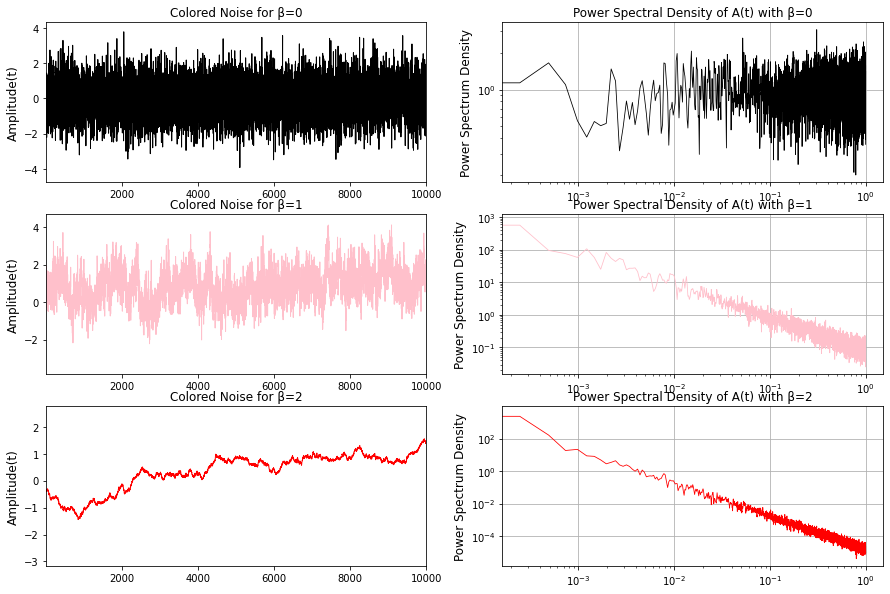

In [ ]:
!pip install colorednoise
import colorednoise as cn
from matplotlib import mlab
from matplotlib import pylab as plt
#import numpy as np

#input values
beta = 1         # the exponent: 0=white noite; 1=pink noise;  2=red noise (also "brownian noise")
samples = 2**16  # number of samples to generate (time series extension)
beta = [0,1,2]
#Deffing some colores
colors = ['black','pink','red']
i=0
A = cn.powerlaw_psd_gaussian(beta[i], samples)

#Deffing the great figure size
plt.figure(figsize=(15,10))
for i in range (len(beta)):
    #Ploting first subfiure
    A = cn.powerlaw_psd_gaussian(beta[i], samples)
    plt.subplot(3,2,2*i+1)
    plt.plot(A, color=colors[i], linewidth=1)
    plt.title('Colored Noise for β='+str(beta[i]))
    #plt.xlabel('Samples (time-steps)')
    plt.ylabel('Amplitude(t)', fontsize='large')
    plt.xlim(1,10000)

    #Ploting second subfigure
    plt.subplot(3,2,(2*i+2))
    spectrum, frequency = mlab.psd(A, NFFT=2**13)
    plt.loglog(frequency,spectrum, color=colors[i], linewidth=0.8)
    plt.title('Power Spectral Density of A(t) with β='+str(beta[i]))
    #plt.xlabel('Frequency')
    plt.ylabel('Power Spectrum Density', fontsize='large')
    plt.grid(True)
    #plt.savefig("color_noide_beta="+str(beta[i])+".pdf")

#ploting the intire figure
plt.show()

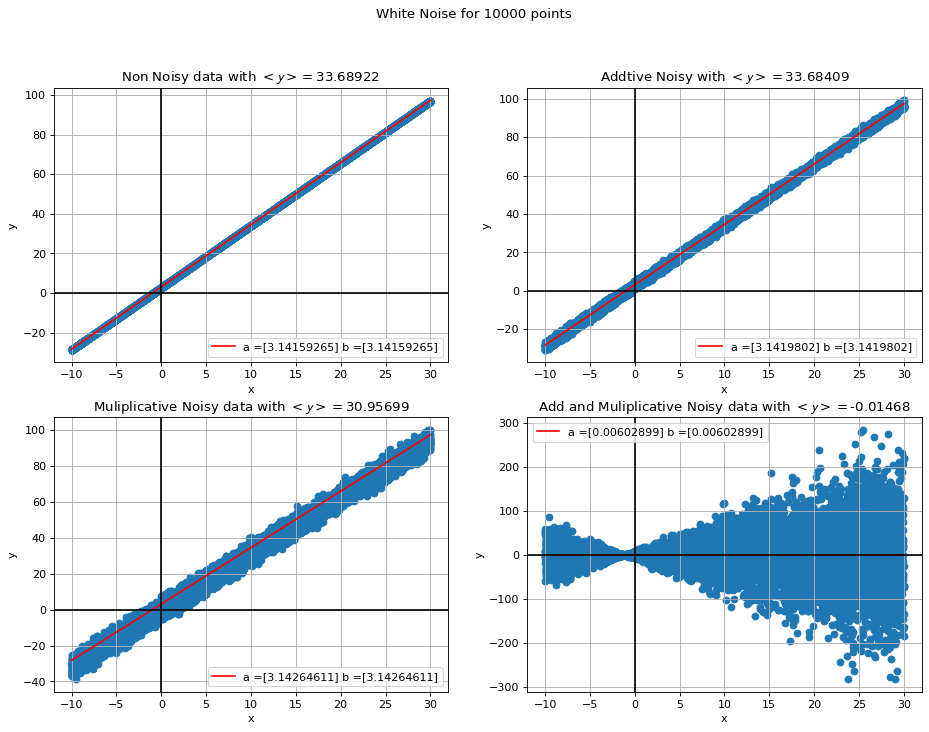

In [ ]:
import numpy as np
from numpy import random

#Size of the data
Number_of_points = 10000

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
#Sorting the x vetor
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = cn.powerlaw_psd_gaussian(0, Number_of_points)

# y of linar distribuiton 
y_non = np.pi*x + np.e
y_add = np.pi*x + np.e + NOISE
y_mul = np.pi*x + np.e*np.array(NOISE)
y_mea = (np.pi*x + np.e +1)*np.array(NOISE) 

import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))

model_non    = LinearRegression().fit(x, y_non)
r_sq_non     = model_non.score(x, y_non)
a_non, b_non = model_non.coef_ ,  model_non.intercept_

model_add    = LinearRegression().fit(x, y_add)
r_sq_add     = model_add.score(x, y_add)
a_add, b_add = model_add.coef_ ,  model_add.intercept_

model_mul    = LinearRegression().fit(x, y_mul)
r_sq_mul     = model_mul.score(x, y_mul)
a_mul, b_mul = model_mul.coef_ ,  model_mul.intercept_

model_mea    = LinearRegression().fit(x, y_mea)
r_sq_mea     = model_mea.score(x, y_mea)
a_mea, b_mea = model_mea.coef_ ,  model_mea.intercept_

figure(figsize=(14, 10), dpi=80)

plt.suptitle('White Noise for '+str(Number_of_points)+' points')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.plot(x,(a_non*x+a_non),color='red',label='a ='+str(a_non)+' b ='+str(a_non))
plt.title('Non Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_non),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,2)
plt.scatter(x,y_add)
plt.plot(x,(a_add*x+a_add),color='red',label='a ='+str(a_add)+' b ='+str(a_add))
plt.title('Addtive Noisy with $<\mathcal{y}> = $'+str(round(np.mean(y_add),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.plot(x,(a_mul*x+a_mul),color='red',label='a ='+str(a_mul)+' b ='+str(a_mul))
plt.title('Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mul),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.plot(x,(a_mea*x+a_mea),color='red',label='a ='+str(a_mea)+' b ='+str(a_mea))
plt.title('Add and Muliplicative Noisy data with $<\mathcal{y}> = $'+str(round(np.mean(y_mea),5)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.show()

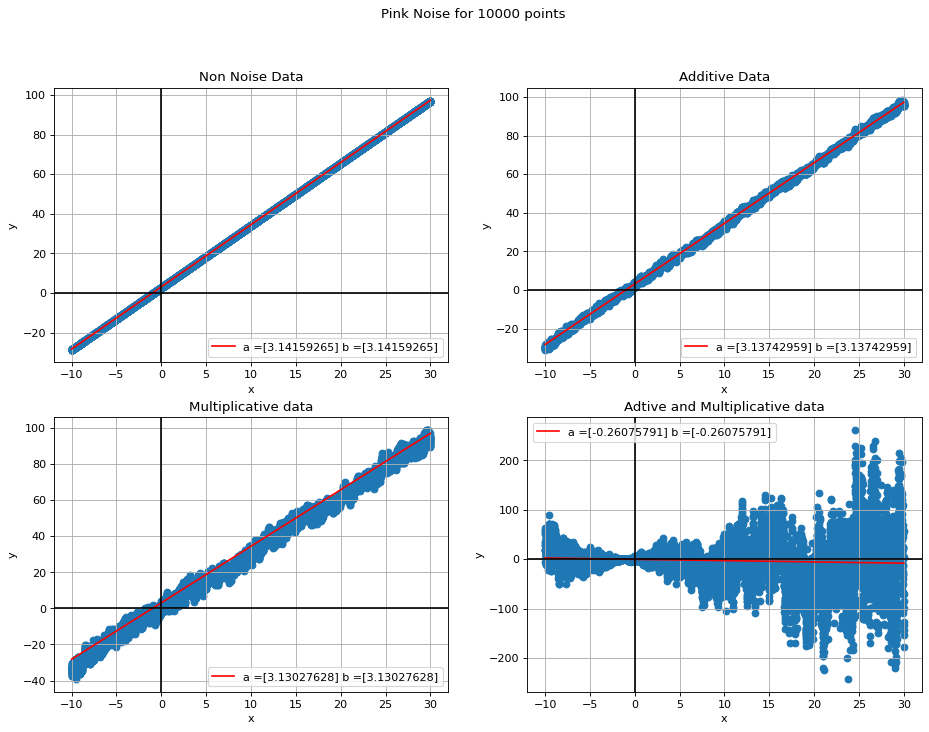

In [ ]:
import numpy as np
from numpy import random

#Size of the data
Number_of_points = 10000

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
#Sorting the x vetor
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = cn.powerlaw_psd_gaussian(1, Number_of_points)

# y of linar distribuiton 
y_non = np.pi*x + np.e
y_add = np.pi*x + np.e + NOISE
y_mul = np.pi*x + np.e*np.array(NOISE)
y_mea = (np.pi*x + np.e +1)*np.array(NOISE) 

import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))

model_non    = LinearRegression().fit(x, y_non)
r_sq_non     = model_non.score(x, y_non)
a_non, b_non = model_non.coef_ ,  model_non.intercept_

model_add    = LinearRegression().fit(x, y_add)
r_sq_add     = model_add.score(x, y_add)
a_add, b_add = model_add.coef_ ,  model_add.intercept_

model_mul    = LinearRegression().fit(x, y_mul)
r_sq_mul     = model_mul.score(x, y_mul)
a_mul, b_mul = model_mul.coef_ ,  model_mul.intercept_

model_mea    = LinearRegression().fit(x, y_mea)
r_sq_mea     = model_mea.score(x, y_mea)
a_mea, b_mea = model_mea.coef_ ,  model_mea.intercept_

figure(figsize=(14, 10), dpi=80)

plt.suptitle('Pink Noise for '+str(Number_of_points)+ ' points')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.plot(x,(a_non*x+a_non),color='red',label='a ='+str(a_non)+' b ='+str(a_non))
plt.title('Non Noise Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,2)
plt.scatter(x,y_add)
plt.plot(x,(a_add*x+a_add),color='red',label='a ='+str(a_add)+' b ='+str(a_add))
plt.title('Additive Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.plot(x,(a_mul*x+a_mul),color='red',label='a ='+str(a_mul)+' b ='+str(a_mul))
plt.title('Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.plot(x,(a_mea*x+a_mea),color='red',label='a ='+str(a_mea)+' b ='+str(a_mea))
plt.title('Adtive and Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.show()

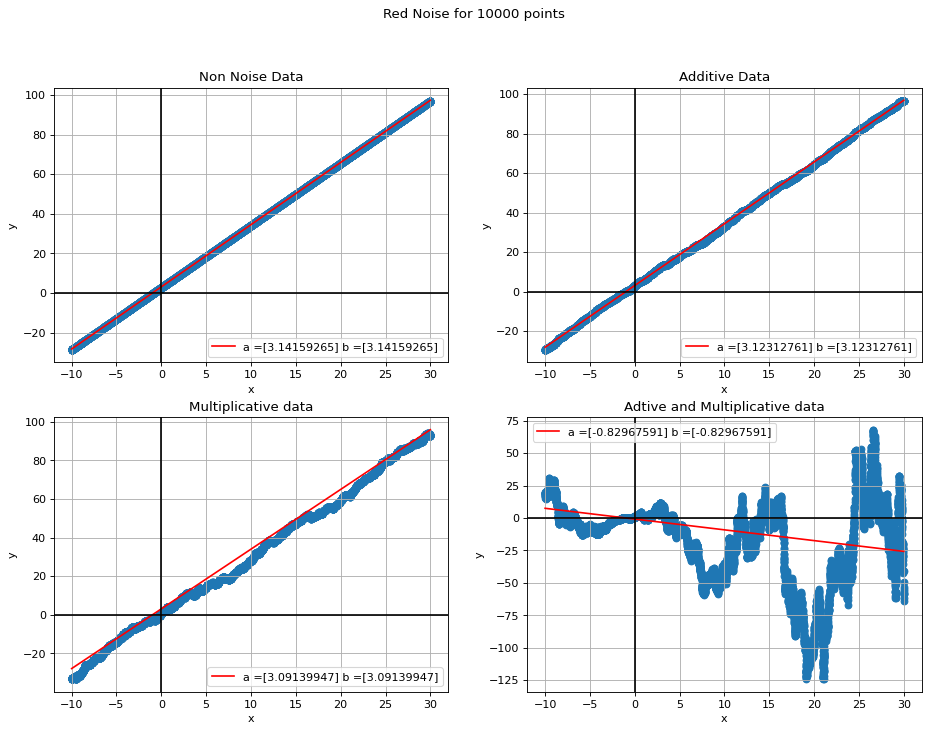

In [ ]:
import numpy as np
from numpy import random

#Size of the data
Number_of_points = 10000

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
#Sorting the x vetor
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = cn.powerlaw_psd_gaussian(2, Number_of_points)

# y of linar distribuiton 
y_non = np.pi*x + np.e
y_add = np.pi*x + np.e + NOISE
y_mul = np.pi*x + np.e*np.array(NOISE)
y_mea = (np.pi*x + np.e +1)*np.array(NOISE) 

import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))

model_non    = LinearRegression().fit(x, y_non)
r_sq_non     = model_non.score(x, y_non)
a_non, b_non = model_non.coef_ ,  model_non.intercept_

model_add    = LinearRegression().fit(x, y_add)
r_sq_add     = model_add.score(x, y_add)
a_add, b_add = model_add.coef_ ,  model_add.intercept_

model_mul    = LinearRegression().fit(x, y_mul)
r_sq_mul     = model_mul.score(x, y_mul)
a_mul, b_mul = model_mul.coef_ ,  model_mul.intercept_

model_mea    = LinearRegression().fit(x, y_mea)
r_sq_mea     = model_mea.score(x, y_mea)
a_mea, b_mea = model_mea.coef_ ,  model_mea.intercept_

figure(figsize=(14, 10), dpi=80)

plt.suptitle('Red Noise for '+str(Number_of_points)+ ' points')

plt.subplot(2,2,1)
plt.scatter(x,y_non)
plt.plot(x,(a_non*x+a_non),color='red',label='a ='+str(a_non)+' b ='+str(a_non))
plt.title('Non Noise Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,2)
plt.scatter(x,y_add)
plt.plot(x,(a_add*x+a_add),color='red',label='a ='+str(a_add)+' b ='+str(a_add))
plt.title('Additive Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()


plt.subplot(2,2,3)
plt.scatter(x,y_mul)
plt.plot(x,(a_mul*x+a_mul),color='red',label='a ='+str(a_mul)+' b ='+str(a_mul))
plt.title('Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y_mea)
plt.plot(x,(a_mea*x+a_mea),color='red',label='a ='+str(a_mea)+' b ='+str(a_mea))
plt.title('Adtive and Multiplicative data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()

plt.show()

# REFERENCES 

* https://stackoverflow.com/questions/63995578/change-colour-of-colorbar-in-python-matplotlib
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html